<a href="https://colab.research.google.com/github/nabiila-29/data-fellowship-5/blob/main/Nabiila_Practice_Case_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Data Preprocessing

In [44]:
#import library
import pandas as pd

In [45]:
#read and check csv file
df = pd.read_csv("https://raw.githubusercontent.com/Syukrondzeko/Fellowship-5/main/epl_1819.csv", thousands=",")
df.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,26581,112,1814,4240,783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,23638,98,2250,3416,721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,25070,146,1774,3874,692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,21295,87,2267,3191,643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,20805,65,2062,3102,605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


# 1. Whether this data is clean?


In [46]:
#check the missing value 
df.isnull().sum()                                 

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

0 indicates there is no missing value.

In [47]:
#check duplicate values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

'False' indicates there is duplicate values in this dataset

In [48]:
#check data type
df.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                      int64
attack_passes_through              int64
attack_passes_long                 int64
attack_passes_back                 int64
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

no data transformation needed. All data has been in numeric type

# 2. How is the point distribution of the epl team? and which team is an anomaly?
 

## 1st Normality Test (Histogram)

In [49]:
# Import library
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


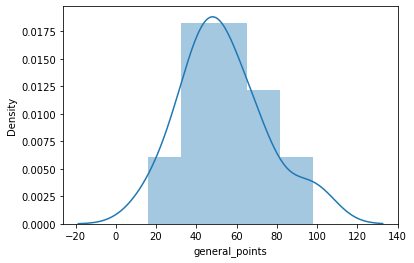

In [50]:
#generate Gaussian Chart 
sns.distplot(df.general_points)

## 2nd Normality Test (QQ)

In [51]:
#import library
from scipy import stats
import scipy as scipy

<Figure size 432x288 with 0 Axes>

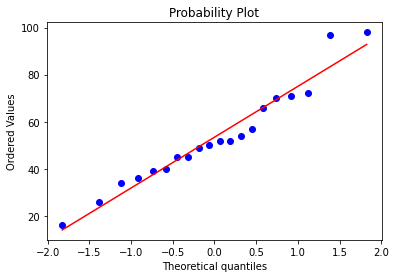

<Figure size 432x288 with 0 Axes>

In [52]:
#generate chart
stats.probplot(df['general_points'],plot=plt)
plt.figure()

## 3rd Normality Test (Shapiro)

In [53]:
#shapiro vilk test
stats.shapiro(df['general_points'])

(0.9527729749679565, 0.41115203499794006)

we see the p-value. The p-value is the second value of the result above. The normal data has p-value 0> 0.05

the p-value of the data is 0.41115203499794006.
.
The data above is normal because the **p-value > 0.05**

## 4th Normality Test (D'Agostin's K-squared test)

In [54]:
stats.normaltest(df['general_points'])

NormaltestResult(statistic=1.946940724454761, pvalue=0.3777697627355659)

If the p-value> 0.05, the distribution of the data is normal. Above we have 0.377. The data distribution is normal

# 3. Which team has the best attack?



In [55]:
#best attack team
best_attack= df.sort_values('attack_scored', ascending=False)
best_attack[['Team', 'attack_scored']].head(2)

,Team,attack_scored
0,Manchester City,95
1,Liverpool,89


Based on the sum of attack score, Manchester City has the best attack.

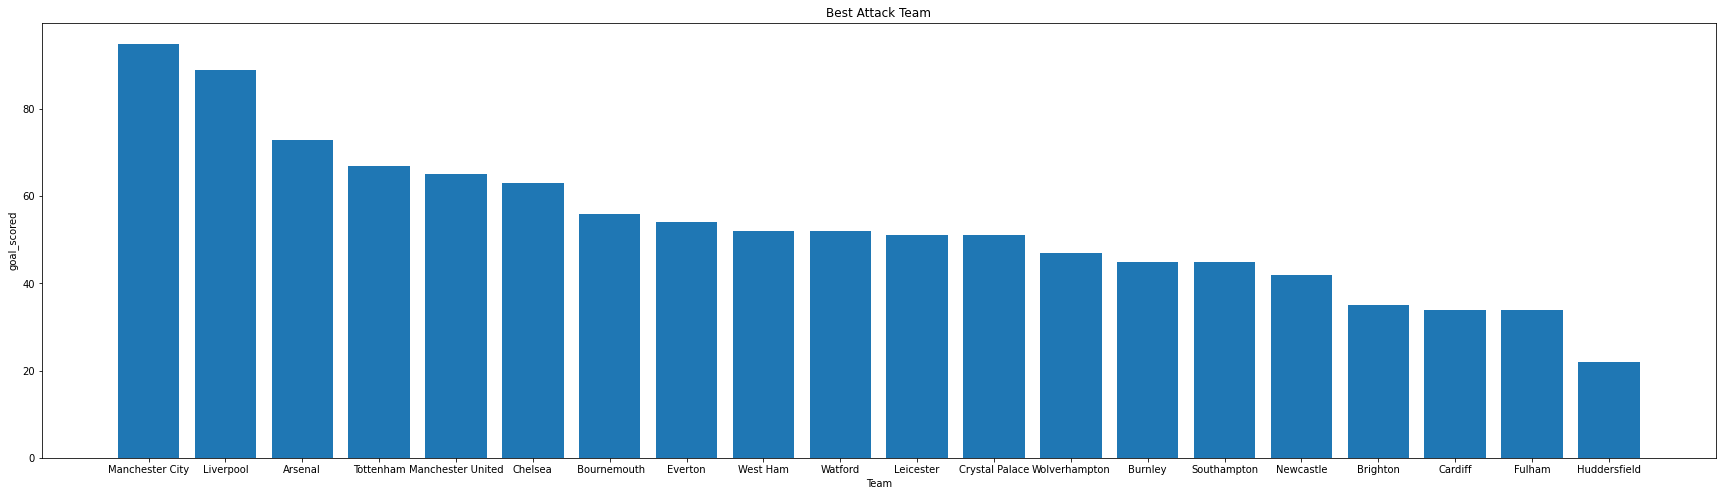

In [56]:
#generate chart
import matplotlib.pyplot as plt

plt.figure(figsize=(30,8))
plt.bar(best_attack['Team'], best_attack['attack_scored'],)
plt.title('Best Attack Team')
plt.xlabel('Team')
plt.ylabel('goal_scored')
plt.show()

# 4. Which team has the best defence?

In [57]:
#best defence team
best_defence= df.sort_values('defence_goals_conceeded', ascending=True)
best_defence[['Team', 'defence_goals_conceeded']].head(2)

,Team,defence_goals_conceeded
1,Liverpool,22
0,Manchester City,23


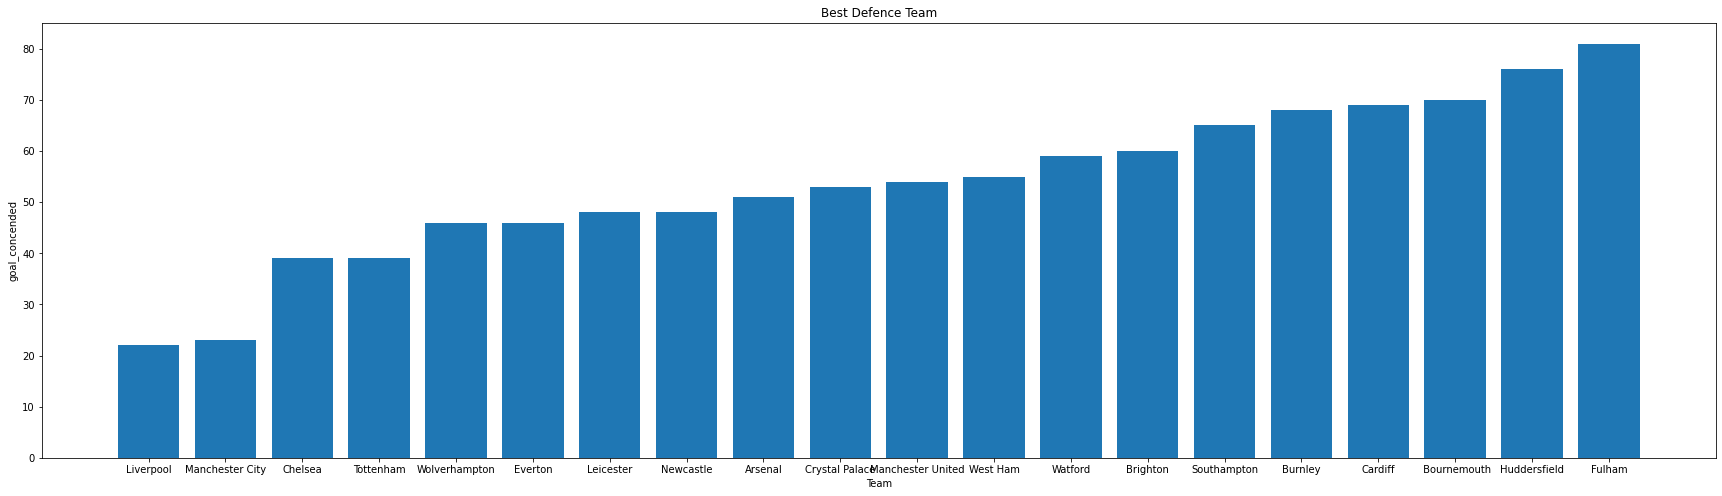

In [58]:
#generate chart
import matplotlib.pyplot as plt

plt.figure(figsize=(30,8))
plt.bar(best_defence['Team'], best_defence['defence_goals_conceeded'])
plt.title('Best Defence Team')
plt.xlabel('Team')
plt.ylabel('goal_concended')
plt.show()

# 5. Which team is good in financial aspect?

In [59]:
#best finance team
best_finance= df.sort_values('finance _tv_revenue', ascending=False)
best_finance[['Team', 'finance _tv_revenue']].head(2)

,Team,finance _tv_revenue
1,Liverpool,152425146
0,Manchester City,150986355


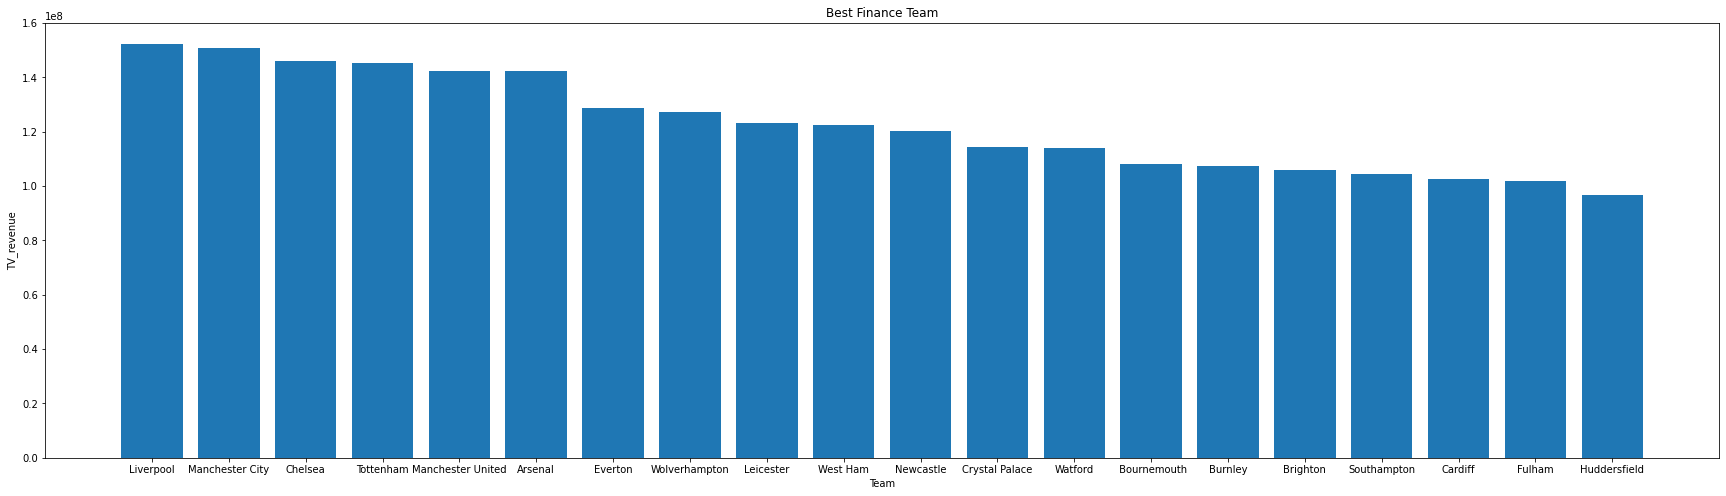

In [60]:
#generate chart
import matplotlib.pyplot as plt

plt.figure(figsize=(30,8))
plt.bar(best_finance['Team'], best_finance['finance _tv_revenue'])
plt.title('Best Finance Team')
plt.xlabel('Team')
plt.ylabel('TV_revenue')
plt.show()

# 6. Correlation TV revenue and the number of wins

I wonder. Does TV revenue correlate with the number of wins?

In [61]:
import numpy as np
np.corrcoef(df['finance _tv_revenue'],df['general_won'])

array([[1.        , 0.93781166],
       [0.93781166, 1.        ]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


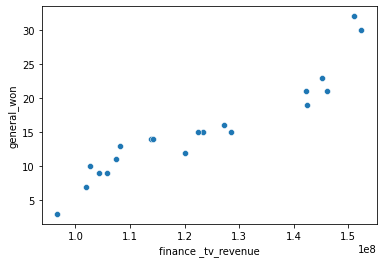

In [62]:
sns.scatterplot(df['finance _tv_revenue'],df['general_won'])

The coeficient is 0.937. It is a strong positive correlation!

It tells us that TV will be more interesting with the winnest team. This is evidenced by the team revenue from TV contract. the higher the number of wins, the higher the revenue. 